In [41]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import time
import yfinance as yf

In [42]:
df = pd.read_csv("tatachem.csv")

In [43]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29 09:15:00+05:30,904.299988,904.299988,899.250000,900.400024,900.400024,0
1,2021-09-29 09:16:00+05:30,899.450012,900.049988,898.849976,899.650024,899.650024,31145
2,2021-09-29 09:17:00+05:30,901.000000,901.000000,896.099976,896.950012,896.950012,23329
3,2021-09-29 09:18:00+05:30,896.000000,896.700012,895.400024,896.700012,896.700012,24065
4,2021-09-29 09:19:00+05:30,897.000000,898.400024,896.450012,896.450012,896.450012,11013


In [44]:
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
1551,2021-10-05 10:06:00+05:30,935.950012,936.200012,934.700012,936.200012,936.200012,13395
1552,2021-10-05 10:07:00+05:30,935.900024,937.450012,935.900024,936.849976,936.849976,13277
1553,2021-10-05 10:08:00+05:30,936.500000,936.900024,935.000000,936.799988,936.799988,10620
1554,2021-10-05 10:09:00+05:30,936.099976,938.000000,936.049988,938.000000,938.000000,8813
1555,2021-10-05 10:10:58+05:30,938.099976,938.099976,938.099976,938.099976,938.099976,0


In [45]:
df= df[["Close"]].copy()

In [46]:
df

,Close
0,900.400024
1,899.650024
2,896.950012
3,896.700012
4,896.450012
...,...
1551,936.200012
1552,936.849976
1553,936.799988
1554,938.000000


In [47]:
df.describe()

,Close
count,1556.000000
mean,917.484962
std,9.401873
min,896.450012
25%,911.500000
50%,914.700012
75%,922.200012
max,949.549988


In [48]:
from statsmodels.tsa.stattools import adfuller

In [49]:
result =adfuller(df.Close.dropna())
print(f"ADF statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF statistic: -2.1170494369195647
p-value: 0.23771443021537464


In [50]:
result

(-2.1170494369195647,
 0.23771443021537464,
 5,
 1550,
 {'1%': -3.4345759114452012,
  '5%': -2.8634064827605656,
  '10%': -2.5677636853277837},
 4429.272986128959)

In [51]:
from statsmodels.graphics.tsaplots import plot_acf

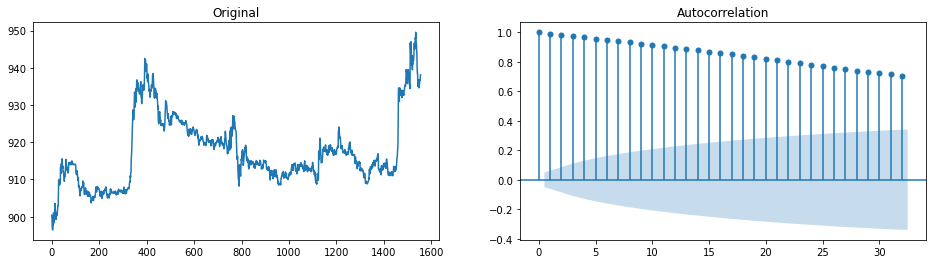

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Close)
ax1.set_title('Original')
plot_acf(df.Close, ax=ax2);

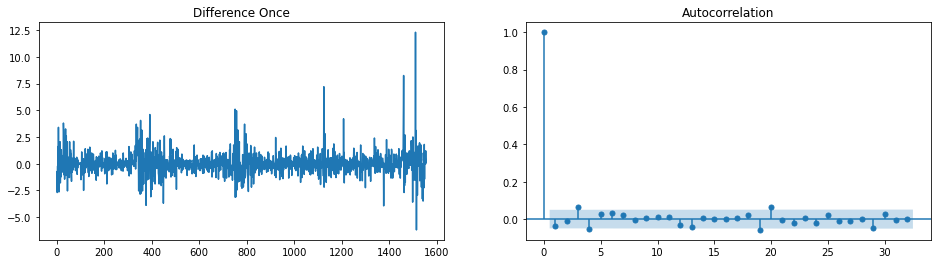

In [53]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff, ax=ax2);


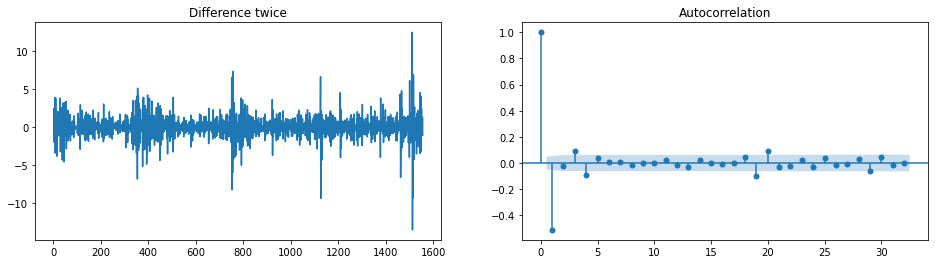

In [54]:
diff = df.Close.diff().diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2);


In [55]:
from pmdarima.arima.utils import ndiffs

In [56]:
ndiffs(df.Close, test="adf")

1

1 is the value of d.

In [57]:
from statsmodels.graphics.tsaplots import plot_pacf

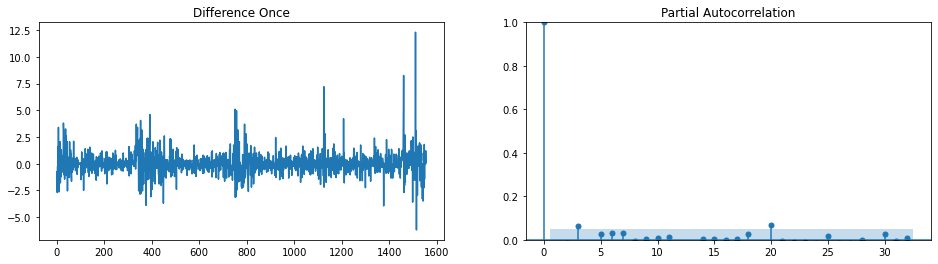

In [58]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);


from above right side graph we can see 5th line have highest height. so p value is 5

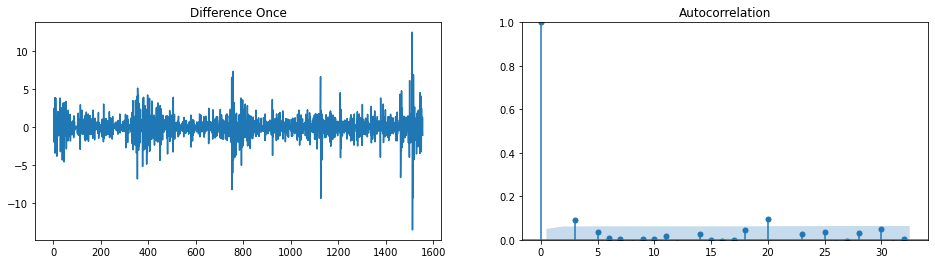

In [59]:
diff = df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

13 can be suitable for the q value becuse of havinig medium height in graph.

p, q, d = 5, 13, 1

Fitting in arima model


In [60]:
df = df.Close.astype('float32')
best_score, best_cfg = float("inf"), None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                mse = evaluate_arima_model(dataset, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
            except:
                continue

print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

NameError: name 'p_values' is not defined

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [99]:
model = ARIMA(df.Close, order=(5,2,1))
result = model.fit(disp=1)

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIM

In [96]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3449
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -5566.199
Method:                       css-mle   S.D. of innovations              1.215
Date:                Mon, 04 Oct 2021   AIC                          11148.398
Time:                        10:49:27   BIC                          11197.564
Sample:                             1   HQIC                         11165.958
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3752      0.054      6.974      0.000       0.270       0.481
ar.L1.D.Close     0.8826      0.046     19.014      0.000       0.792       0.974
ar.L2.D.Close     0.0075      0.023     

(array([1.44564248e-01, 6.39975143e-03, 1.75335656e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.38339139e-05]),
 array([-5.78174937,  0.83274354,  7.44723645, 14.06172936, 20.67622227,
        27.29071518, 33.90520809, 40.519701  , 47.13419392, 53.74868683,
        60.36317974]),
 <BarContainer object of 10 artists>)

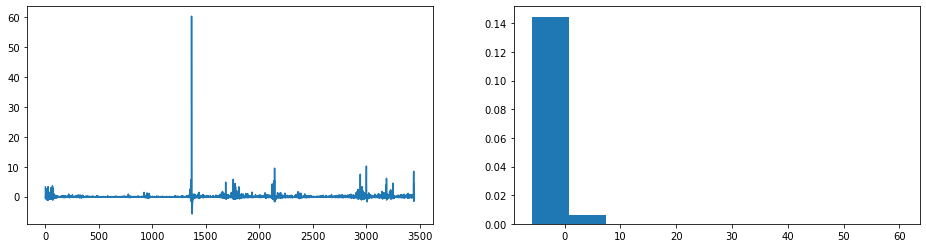

In [97]:
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density= True)

ValueError: The start index -2 of the original series  has been differenced away

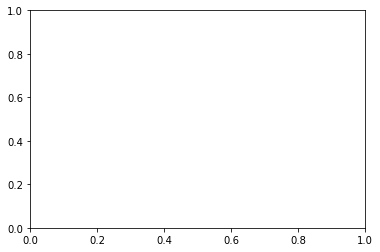

In [98]:
result.plot_predict(
    start=-1,
    end=60,
    dynamic=False,
);